In [11]:

import sklearn

print(sklearn.__version__)

1.7.2


#### 사이킷런scikit-learn == 1.0.2
- 특정버전 설치할때는 == 사용
#### <주의> 정확한 버전 사용해야함

- 아나콘드 프롬프트 가상환경실행
- cd \big20\ml_dev
- conda activate ml_dev
- conda env export > enviornment.yml
- 사수한테 "얌yml파일주세요" 그럼 사수가 yml준파일로 가상환경만들수있다.
- 사수랑 환경이 동일해짐,개발환경이 동일해야함,동일개발환경,동일한개발환경

- 사수랑 똑같은 가상환경 만들어야 함
- cd \big20\ml_dev
- conda env export > enviornment.yml 
#- 현재 활성화된 conda 환경의 패키지 목록과 버전 정보를 environment.yml 파일로 저장
- vscode enviornment.yml파일에서 dev01바꿔야함
- conda env create -f enviornment.yml
#- 위에서 만든 environment.yml 파일을 기반으로 새 conda 환경을 생성
- conda env list






##### 📚 scikit-learn 주요 모듈 정리 다외우기!!!!!!!!!!!!!
#### 입력프롬프트: vscode md파일에서 읽을수 있도록 형식바꿔줘

#### 📦 sklearn.datasets
- 실습용 데이터셋을 제공합니다.
- 예시:
  - `load_iris`: 붓꽃 분류 데이터셋
  - `load_boston`: 보스턴 주택 가격 회귀 데이터셋 *(현재는 deprecated)*

#### 🧼 sklearn.preprocessing
- 데이터 전처리를 위한 다양한 기능을 제공합니다.
- 예시:
  - `StandardScaler`: 평균 0, 표준편차 1로 스케일링
  - `MinMaxScaler`: 최소-최대 범위로 정규화
  - `LabelEncoder`: 범주형 라벨을 숫자로 변환

#### 🎯 sklearn.feature_selection
- 모델에 중요한 피처를 선택하여 성능 향상에 도움을 줍니다.

#### 🧲 sklearn.feature_extraction
- 텍스트나 이미지에서 벡터 형태의 피처를 추출합니다.
- 예시:
  - `CountVectorizer`: 단어 빈도 기반 벡터화
  - `TfidfVectorizer`: TF-IDF 기반 벡터화

#### 📉 sklearn.decomposition
- 차원 축소 알고리즘을 제공합니다.
- 예시:
  - `PCA`: 주성분 분석
  - `TruncatedSVD`: 희소 행렬용 SVD 기반 차원 축소

#### 🔀 sklearn.model_selection
- 데이터 분할, 교차 검증, 하이퍼파라미터 튜닝 등을 지원합니다.
- 예시:
  - `train_test_split`: 학습/테스트 데이터 분할
  - `KFold`: K-겹 교차 검증
  - `GridSearchCV`: 하이퍼파라미터 탐색

#### 📊 sklearn.metrics : 평가
- 모델 성능 평가 지표를 제공합니다.
- 예시:
  - `accuracy_score`: 정확도
  - `precision_score`: 정밀도
  - `recall_score`: 재현율
  - `roc_auc_score`: ROC AUC 점수

#### 🧬 sklearn.ensemble
- 여러 모델을 결합한 앙상블 알고리즘을 제공합니다.
- 예시:
  - `RandomForestClassifier`: 랜덤 포레스트 분류기
  - `GradientBoostingClassifier`: 그래디언트 부스팅 분류기

#### 📈 sklearn.linear_model
- 선형 모델을 제공합니다.
- 예시:
  - `LinearRegression`: 선형 회귀
  - `LogisticRegression`: 로지스틱 회귀
  - `Ridge`: 릿지 회귀
  - `Lasso`: 라쏘 회귀

#### 🌳 sklearn.tree
- 결정 트리 기반 알고리즘을 제공합니다.
- 예시:
  - `DecisionTreeClassifier`: 결정 트리 분류기

#### 🧩 sklearn.cluster
- 비지도 학습 기반 군집 알고리즘을 제공합니다.
- 예시:
  - `KMeans`: K-평균 군집화
  - `DBSCAN`: 밀도 기반 군집화

#### 🔗 sklearn.pipeline
- 데이터 전처리와 모델 학습 과정을 하나로 묶어줍니다.
- 예시:
  - `Pipeline`: 여러 단계의 작업을 순차적으로 연결

In [12]:
# 2.2 데이터 준비(Data Preparation)
# 목표: 붓꽃 품종 분류(예측)
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris # function -> 실행하면 데이터 로딩 -> 텍스트
from sklearn.tree import DecisionTreeClassifier # class, 분류에 사용된 알고리즘
from sklearn.model_selection import train_test_split # 함수: 학습데이터와 평가데이터 분리



In [13]:
# 데이터 로딩,확인
iris = load_iris()
iris # 결과: 중괄호에 :(콜론)들어가면 딕셔너리

iris.get('data') # 데이터(values) ,결과:array -> ndarray임
iris.get('target') # 정답
iris.get('target_names') # 정답의 이름 (0,1,2에 해당하는 이름)
iris.get('feature_names') # 컬럼명





['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# 데이터 프레임 생성
# 데이터 추출
iris_data = iris.get('data')
# 레이블(답)
iris_label = iris.get('target')

iris_df = pd.DataFrame(
    data = iris_data,
    columns = iris.get('feature_names'), # 컬럼며은 아까 위에서 말한 feature_name
)
iris_df.head()

# 테이블에 레이블 추가
iris_df['label'] = iris_label

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# 데이터가 숫자이기때문에 model에 집어 넣으면 된다.
# <주의>학습할때 전체 데이터 넣으면 안됨
# 1. 학습에 사용하는  data
# 2. (test)평가에 사용하는 data

In [16]:
# 학습 데이터와 성능을 평가하는 데이터 분리
# train_test_split(전체 data,전체 label,비율,랜덤시드부여)
# return: tuple => (train data, test data, train label, test label) :

# X_train(학습에 사용할 데이터), X_test(테스트에 사용할 데이터), 
# y_train(학습에 사용할 데이터), y_test (테스트에 사용할 데이터)
# y가 소문자: 벡터다
X_train, X_test, y_train, y_test = train_test_split(
    iris_data,iris_label
    ,test_size=0.2 # 전체 데이터의 20%를 테스트 데이터로 만들겠다.
    ,random_state = 11 # seed value (시드를 주면 랜덤한 값-random value이 고정됨)
) 
# 시험문제가 바뀐다고 내 점수가 바뀌면 안됨->random 사용
# 즉 random 하게추출됫을때 random 값이 바뀌면 안됨 -> random_state 사용(시드값을 줘서 고정하겠다.)

print(X_train.shape) # 학습데이터
print(X_test.shape) # 테스트 데이터
print(y_train.shape) # 학습에 사용할 레이블
print(y_test.shape) # 테스트에 사용할 레이블


(120, 4)
(30, 4)
(120,)
(30,)


In [17]:
y_train # 결과가 섞임(random 처리됨)

array([0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

In [18]:
# 2.3 모델 학습(Model training)

# 어떤 알고리즘을 사용할지 : 품종 분류 모델 -> 분류알고리즘 적용(Random Forest,GBM,XGboost,lightBGM):트리계열
# 먼저해야할거: 우리가할게 "분류" 인지 "회귀(연속값 예측)인지"
# 분류:분류 예측 (setosa, versicolor, versinica)
# 회귀:연속값 예측(온도,아파트 가격,주식가격) -> 정확도 X why?연속된값은 전체가 무한대이기때문에 안된

# 분류모델인떈 clf 붙이는게 좋음
# splitter: = 하이퍼파라미터 값 -> 얘를 어떻게 주느냐에 따라 성능 달라짐
dt_clf = DecisionTreeClassifier(random_state= 42) # 오브젝트 생성 , 42는 선생님이 정해놓은 값

# 학습 진행
dt_clf.fit(X_train, y_train) # 파라미터값 출력됨
# X: trainData
# y: trainlabel


# hyper parameter: 개발자 지정하는 할 수 있는 파라미터 -> 값을 잘 줘야함 ,모델 성능여부 결정함
# 자주쓰는거 : max
# 학습은 끝 ~~~~ => 평가해야함

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
# 2.5 평가 : 테스트 데이터(X_test)(학습에 사용되지 않은 데이터) => new data
# 라지X : 행렬이다~
# 분류의 평가지표: 정확도(예측값과 원래답이 얼마나 정확한가?)
# -- 오차 행렬(confusion matrix) : 
# , 재현율(원래답을 얼마나 재현), 정밀도(예측이 정밀하냐?)
# , f1 score(재현율/정밀도 조화평균), AUC (면적) 재현율과 정밀도 정량화한 값

# 정확도 평가 : 예측값, 원래답(y_test) 비교
# 예측값 추출: 30개
preds = dt_clf.predict(X_test) # X_test: 테스트 데이터~~!!
X_test, preds # 결과:feature-4개, row:30개
preds, y_test # 예측값, 원래답 나옴 숫자하나씩 대응되는 값 비교 

(preds == y_test).sum() # 총 몇개 맞았는지
preds == y_test # 맞은개수 : 2개는 틀리고 나머지는 다 맞았다.
preds != y_test # 틀린개수 : 반대로 true 가 2개다.

(preds == y_test).sum() / len(y_test) # 맞은비율
(preds != y_test).sum() / len(y_test) # 틀린비율

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print(f'예측정확도 : {acc:.4f}입니다') #.4f콜론으로 지정해라
# 베이스모델임- 파라미터는 기본값으로만 지정한 모델
# 근데 이data는 

예측정확도 : 0.9333입니다


In [20]:
# 03.Scikit-learn의 핵심 API:Estimator 와 Transformer


# <수업중> 어느 범위인지에 따라서 바라보는 관점 및 용어가 다른다.
# 통계에서~~~   / 추론   /
# 선형대수에서~~/ 최적화 / 딥러닝에서와 같은 범주로 생각해야함
# 머신러닝에서~~ /예측  /


# 공분산 : 두개 피쳐에서의 관계, 선형대수에서는 내적이다.
# 어디에서 쓰이는 용어인지 잘 구분해야함
# 나중에 보면, 내적의 식이 공분산과 동일하다.

# 공분산 식: 
# 딥러닝 할때는 "선행대수"를 깊게파라~


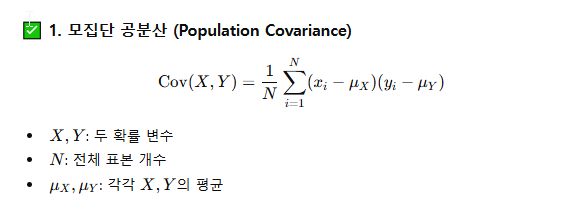

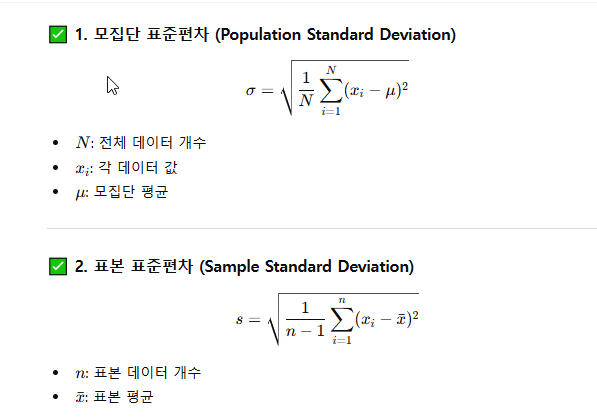


In [21]:
# 03.Scikit-learn의 핵심 API:Estimator 와 Transformer
# Estimator(최상위) >> class(DTC,RFC,GBM,XGboost,DigitGBM) 
# Estimator 안에 fit(),Predict()존재함
# class(DTC,RFC,GBM,XGboost,DigitGBM) 상속받은이유 Estimator 오버라이딩 할려고(재정의)


# 모든 알고리즘은 fit(),predict()할수있다. --> 그래서 사이킷런이 편하다
# 학습은 fit()
# 예측은 predict()
# 따로 코드 안바꿔도 됨, 오브젝트만 바꿔도 된다(다형성)
# 결론)공통된 method메서드를 가진다.

In [22]:
# 5.1과적합(Overfitting) 문제
# 과적합은 모델이 학습 데이터에 너무 치중하여 학습한 나머지, 학습 데이터에 대해서는 거의 완벽한 예측 성능을 보이지만 새로운데이터(테스트 데이터)에 대해서는 성능이 급격히 떨어지는 현상



In [23]:
# 5.2데이터분할 : 학습,검증,테스트 데이터
# 과적합이 생기기때문에 분할이 필요하다


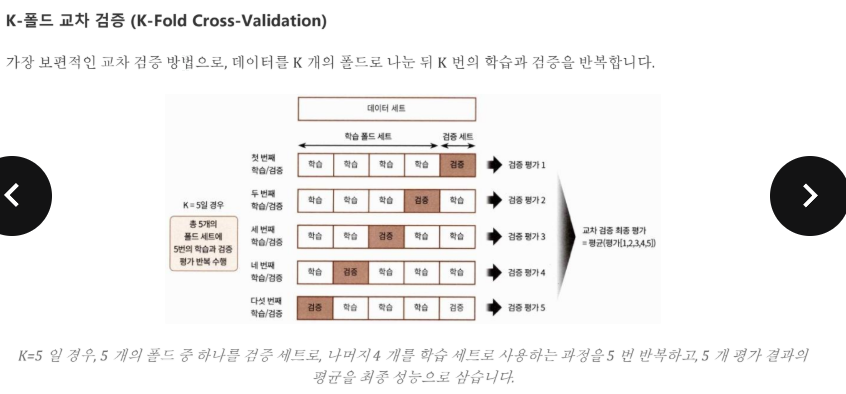

- 검증평가1~5를 평균을 내야지 과적합인지 아닌지 확인 가능함

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # 몇겹으로 교차검증 할지~~
                                          # GridSearchCV: 하이퍼파라미터 튜닝
import numpy as np
# validation data 필요한 이유: 학습데이터가 잘 학습되고 있나


In [25]:
from sklearn.model_selection import StratifiedKFold # 계층적 KFold- -> label기준으로 나눠야함
                                                    
# 데이터 로딩

iris = load_iris()
data_arr = iris.data # iris.get('data')
label = iris.target  # iris.get('target')

# train_test_split(data_arr,label,test_size=0.2, )
# 5개의 폴드로 분할하는 KFold 객체 생성
skf = StratifiedKFold(n_splits=5) # 학습 후 결과(정확도)가  5개 나옴
cv_acc= [] #정확도 저장하는 빈 리스트

n_iter = 0 #반복 횟수

df_clf = DecisionTreeClassifier(random_state=156) #random_state=156 고정용

for train_idx, validation_idx  in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train =iris_df['label'].iloc[train_idx]
    label_test = iris_df['label'].iloc[validation_idx]

    print(f'교차검증:{n_iter}')
    print(f'학습 레이블 데이터 분포 :\n {label_train.value_counts()}')
    print(f'테스트 레이블 데이터 분포 :\n {label_test.value_counts()}')



# for train_idx, validation_idx in StratifiedKFold.split(data_arr) :
#     n_iter +=1 # 1증가 , 반복횟수가 1,2,3,4,5로 나오는게 좋음 (0,1,2,3,4,5)보디
#     # 데이터
#     X_train, X_test = data_arr[train_idx], data_arr[validation_idx]
#     # X_train : data_arr[train_idx]
#     # X_test : data_arr[validation_idx]
    
#     # 레이블
#     y_train, y_test = label[train_idx],label[validation_idx]
    
#     #학습,평가
#     df_clf.fit(X_train,y_train)
#     preds = df_clf.predict(X_test)
    
#     #정확도 계산
#     acc = np.round(accuracy_score(y_test, preds),4) # 4번째 자리에서 반올림
    
#     # 학습 데이터 수, 검증 데이터 수 
#     train_size = X_train.shape[0] # 수만 필요하니깐 앞에 있는 것만 가져오기
#                                   # (120,4) => 120
#     test_size = X_test.shape[0] #30 
#     print(f'# {n_iter}교차 검증 정확도 : {acc},학습데이터 크기 : {train_size},검증데이터 크기: {test_size}')
#     cv_acc.append(acc) # 5번돌아가니 append 도 5번 추가됨


print(f'평균정확도: {np.mean(cv_acc)}')


# dt_clf = DecisionTreeClassifier(random_state=156)

교차검증:1
학습 레이블 데이터 분포 :
 label
0    40
1    40
2    40
Name: count, dtype: int64
테스트 레이블 데이터 분포 :
 label
0    10
1    10
2    10
Name: count, dtype: int64
교차검증:2
학습 레이블 데이터 분포 :
 label
0    40
1    40
2    40
Name: count, dtype: int64
테스트 레이블 데이터 분포 :
 label
0    10
1    10
2    10
Name: count, dtype: int64
교차검증:3
학습 레이블 데이터 분포 :
 label
0    40
1    40
2    40
Name: count, dtype: int64
테스트 레이블 데이터 분포 :
 label
0    10
1    10
2    10
Name: count, dtype: int64
교차검증:4
학습 레이블 데이터 분포 :
 label
0    40
1    40
2    40
Name: count, dtype: int64
테스트 레이블 데이터 분포 :
 label
0    10
1    10
2    10
Name: count, dtype: int64
교차검증:5
학습 레이블 데이터 분포 :
 label
0    40
1    40
2    40
Name: count, dtype: int64
테스트 레이블 데이터 분포 :
 label
0    10
1    10
2    10
Name: count, dtype: int64
평균정확도: nan


c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [26]:
iris_df.head( ) # 레이블까지 포함되있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# 간편한 교차 검증 : cross_val_score(우리가for문 안돌려되는 게 있음)
# cross_val_score(estimator,data,label,scoring,cv)
# return [acc,acc,acc] :리스트로 반환함, fold한 갯수만큼 반환(for문 안돌려도 됨)
# 베이스 모델 테스트용 : 알고리즘의 기본 성능 파악 할때 사용

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np


iris_data = load_iris()
# df_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)

data = iris_data.data       #전체 데이터
label = iris_data.target    # 전체레이블

scores_df = cross_val_score(df_clf,data,label,scoring= 'accuracy',cv=3)
scores_rf = cross_val_score(rf_clf,data,label,scoring= 'accuracy',cv=3)
print(f'교차 검증 정확도 : {scores_df}')
print(f'교차 검증 정확도 : {np.round(np.mean(scores_df),4)}')
print(f'교차 검증 정확도 : {scores_rf}')
print(f'교차 검증 정확도 : {np.round(np.mean(scores_rf),4)}')



# dt_clf.predict() #정확도만 뽑는거라서 이하 작업은 안됨
# rf_clf.predict() #정확도만 뽑는거라서 이하 작업은 안됨

교차 검증 정확도 : [0.98 0.94 0.98]
교차 검증 정확도 : 0.9667
교차 검증 정확도 : [0.98 0.94 0.96]
교차 검증 정확도 : 0.96


#### 6.하이퍼파라미터 튜닝 : 중요하고, 시간많이 걸림, 최적의 모델 찾기
- 4장 분류: Tree계열(나누다 보면 다 나눌 수 있다.)
- Tree:빨,파란색 최대한 섞이지 않게 분리(나누는것)
- 걑은색끼리 모여있으면 더이상 못나눔 결국, 불순도 제거 = Tree가 제거하는 방식
- depth가 깊어지면 깊어질수록 끝까지 나눌 수 있다(overfitting) , 일반화성능떨어져서 ->안좋은 성능됨
- 결론)max depth를 통한 가지치기:끝까지 가지 말고 적절히 짤라줘라(ex, depth=3 까지만 써라)= overfitting 방지


#### 6.1.GridSearchCV: 최적의 하이퍼파라미터 탐색
- 어디서 어디부터 탐색하라이렇게 구간을 정해주는것 ->사람이 하는일
- 모든 조합에 대해 교차검증 수행한다, 가장 높은 성능 보인 조합 찾아줌 도구
- 딥러닝으로 갈수록 hyperparameter에 민감하다(특히: learning rate)



In [28]:
# GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
import pandas as pd




In [29]:
# 데이터 로딩
iris = load_iris()
# 학습 데이터와 테스트 데이트 분리
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
    random_state=121
)

# 모델 오브젝트 생성
dt_clf = DecisionTreeClassifier()

# 키로 DecisionTreeClassifier 의 파라미터에 있는 명 그대로 쓰기
params = {
    'max_depth':[1,2,3],
    'min_samples_split' : [2,3],  # 2*3 => 총 6번 반복
}

grid_result = GridSearchCV( # object 생성
    # 부모 레퍼런스 변수는 자식을 받을 수 있다.
    estimator=df_clf, # estimator
    param_grid = params,
    cv=3, # 위에 6*3 => 18개 모델을 만든다.
    refit = True,  # 다시학습하는거를 True 줌 , 18개나올때마다 다시학습해라~~~
)

#학습
grid_result.fit(X_train, y_train)

,estimator,DecisionTreeC...dom_state=156)
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_split': [2, 3]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [30]:
grid_result.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [31]:
# 최고점수(정확도) : 학습데이터에 대한 정확도
grid_result.best_score_

np.float64(0.975)

In [32]:
# 일반화(테스트데이트)성능 평가
best_dclf = grid_result.best_estimator_ # 모델:DecisionTree로 넣었으니 결과 도 DecisionTree 나옴
# best 모델이란: grid_result.best_params_이 적용된 즉,grid_result.best_score_적용된 모델

preds = best_dclf.predict(X_test)
preds

acc = accuracy_score(y_test,preds)
print(acc)

0.9666666666666667


In [33]:
# 학습 결과를 단계를 저장하는 객체: cv_results
# 시각적 확인 중요함~~~~
print(grid_result.cv_results_)

score_df = pd.DataFrame(grid_result.cv_results_)
score_df
#결론: depth가 3일때 best 였기때문에 depth을 4이상으로 늘릴수도 있다.
# 이범위를 편하게 잡아주는 넘이 있다. 

{'mean_fit_time': array([0.00100327, 0.00100001, 0.00099937, 0.00099635, 0.00066868,
       0.00066543]), 'std_fit_time': array([1.59342588e-06, 2.73460556e-06, 8.77806426e-07, 1.40377058e-06,
       4.72834009e-04, 4.70528232e-04]), 'mean_score_time': array([0.0006636 , 0.00033236, 0.00033394, 0.00033458, 0.00066646,
       0.00033379]), 'std_score_time': array([0.00046925, 0.00047002, 0.00047227, 0.00047317, 0.00047126,
       0.00047204]), 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
             mask=[False, False, False, False, False, False],
       fill_value=999999), 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
             mask=[False, False, False, False, False, False],
       fill_value=999999), 'params': [{'max_depth': 1, 'min_samples_split': 2}, {'max_depth': 1, 'min_samples_split': 3}, {'max_depth': 2, 'min_samples_split': 2}, {'max_depth': 2, 'min_samples_split': 3}, {'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_sp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001003,1.593426e-06,0.000664,0.000469,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.001000,2.734606e-06,0.000332,0.000470,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000999,8.778064e-07,0.000334,0.000472,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000996,1.403771e-06,0.000335,0.000473,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000669,4.728340e-04,0.000666,0.000471,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000665,4.705282e-04,0.000334,0.000472,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [34]:
## 트리는 데이터가 너무 많으면 오히려 골치아프다.
## 프로젝트 주제가 중요함

In [35]:
# 7.1 범주형(문자) 데이터 인코딩
# 이름: 그룹을 묶기 위해 존재X,한명을 구분하기 위해서
# 범주형은 일반적으로 문자지만, 문자라고해서 다 범주형은 아니다.

# 데이터 인코딩(ML) : 문자(범주형) ---변환---> 숫자
# -범주형이 아닌데이터는 숫자로 바꾸기 어렵다.

#[1]레이블 인코딩(변환): 문자 --> 숫자[vectorizer] /사용안함
# 머신러닝 알고리즘은 대부분 숫자 데이터만 처리할(트리계열은 숫자아니어도 OK)
# <정리> 딥러닝은 선형대수
# 안쓰는 이유: 머신러닝 학습에 트리가 다름
# 인코딩 변환값: [0 1 4 5 3 3 2 2]: 번호 의미가 없다. / 근데 머신러닝은 저 값에 의미를 부여한다,안쓴다.
# 머신러닝은 계산할때 숫자에 영향을 받는다, 레이블 인코딩한놈을 머신러닝에 집어넣으면 안된다.
# "분류"가 들어가 있으면 "범주형"

#[2]원-핫 인코딩 : 전자제품의 중-분류
#코드성 데이터:
# <주의> 원핫을 transforming 하면 ndarray가 아니당~
# 희소행렬 : 0001000[ndarray] -> 이렇게 0이 많은 행렬 / 원본을 그대로 저장하면 메모리 누수 많이 생김 ->(1,1),(2,2)이렇게 해당 품목에 있는 좌표만 저장 , nadarray가 아님, 좌표값만 저장함
# (결론) 다시 ndarray로 바꿔넣어야함

#[]


In [36]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [37]:
items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
items_2d = np.array(items).reshape(-1,1)
# items_2d # 8행 1열짜리 2차원 배열 나옴
oh_encoder = OneHotEncoder()        #카테고리 구한것 
oh_encoder.fit(items_2d)
oh_labels = oh_encoder.transform(items_2d)      # 카테고리에 맞게 변환
print(type(oh_labels))
# <중요>8* 6열일때 6열은 범주(중복제거한 카테고리)이다!!!!!!!!
# <class 'scipy.sparse._csr.csr_matrix'> : 희소행렬 object이다~

# 실제로 머신러닝에 집어넣을려면~
print("======8x6행렬=======\n",oh_labels.toarray()) 

# <주의>근데 이걸 바로 머신너링에 넣 을수 없음 왜? 사이즈가 안맞음 -> 전치해서 6x8로 바꿔야함

<class 'scipy.sparse._csr.csr_matrix'>
======8x6행렬=======
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [38]:
# 7.2 피쳐스케일링(Feature Scaling)
# [거리기반] 알고리즘 : 맨해튼 / 알고리즘 
# 원핫:범주형 data 스케일링
# 피처스케일링: 연속형 data 스케일링

# <SV>:supported vector:벡터를 가지고 분류하고 벡터를 가지고 회귀한다.
# SVC(classification) : 분류
# SVR(regression) : 회귀

# 학습법
# 1. 거리기반 학습
# 2. 경사하강법(GD) : 이게 신경망에서 학습이다~ / 미분이다 / 결국 신경망 학습은 미분(기울기)이다!
## 신경망은 GD가 핵심이고, 이걸 빠르게 처리하는게 GPU다!!!!!!

# 피쳐스케일링:Tree 제외 나머지 
# Tree 계열: 스케일링 안해도 된다~~

# [1] 표준화(Standardization)
# Z-score : x,y가 다르기에 이 두개를 동일하게 만들어 주는거 
# Z-score = X-u(뮤) / 시그마
# (뮤):모집단에서 평균 , (시그마): 모집단에서 표준편차
# 평균중심화 : 어떤값이든 평균을 뺴버리면 데이터가 0으로 이동한다~~~~ : 평행이동
# <주의> 수식에서 평균을 뺀다? --> 다 0으로 이동한다~~

# 시그마 : 분모만큼 줄이겠다!
# 5/10 -> 분모만큼 10배 줄이겠다


# Expect기댓값 : 평균이구나~~라고 생각하기
# 루트안(data에서 평균뺀 합 평균)
# 분자: 오차제곱합이 최소가 되기 위해서 평균을 빼야함
# [2_1].분자는 편동성인데 편동성을 줄이기 위해서 나온것이 평균이다!
# 분산(정보량)이고, 딥러닝은 분산이 많은게 좋고, 통계에서는 분산이 적은게 좋음
# [2_2].분산이 또 중요한 이유:정보량 유지위해서
# 결론)변동성 줄이기 위해서 평균에서 뺀거다!
# 평균이 0이라고 해서 x,y값이 같은건아니다. 
# ex)우리나라 평균키를 찾을 순없지만 기댓값은 알수있다. 왜? 기댓값은 "표본"에서의 평균이니까
# <주의>딥러닝은 정보를 가지고 학습한다~~, 딥러닝은 다 선형대수이다~
# -->이 통계식은 행렬,연산으로 바꿀 수 있다~
# 표준화라고 해서 정규분포인건 아니다~.
# 표준편차로 scaling(크기줄임)한다~~

# 표준화이유
# 1.위치값 상실
# 2.정보량 유지


# [2] 정규화
# =축소



In [39]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
data_arr1 = np.arange(10).reshape(-1,1)
data_arr2 = np.arange(10,20).reshape(-1,1)
data_arr1, data_arr2

scaler.fit(data_arr1)
scaled_arr1 = scaler.transform(data_arr1)
print(data_arr1)
print(scaled_arr1)

scaler.fit(data_arr2)
scaled_arr2 = scaler.transform(data_arr2)
print(data_arr2)
print(scaled_arr2)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [40]:
# 7.3 스케일링 시 주의사항:fit()과 transform()분리
# <서론>뮤와 시그마를 알면 data를 알수 있다.
# <본론>근데new data를 평가에 사용하면 data를 알게되니 new data를 평가에 사용할 수 없다.
# <결론>전체 data로 fit 하면 안됨 ,train data로 피팅해야함 -> 그 결과로 : 시그마,평균 알게 됨

# 코딩은 알아서 해라

In [41]:
# 8.종합 실습: 타이타닉 생존자 예측
# <순서>
# 1.데이터분석
# 2.전처리
# 3.모델링
# 4.평가
# 5.튜닝


In [42]:
# 8_1. 탐색적 데이터 분석(EDA)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:

titanic_df = pd.read_csv('../data/train.csv')
titanic_df.head(3)
titanic_df.info()  # object: 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
import warnings
warnings.filterwarnings('ignore') # 강제로 경고 뜨는거 없애기

# 결측치 처리
# Age:평균,Cabin, Embarked : N

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace = True)

# Null 개수
# titanic_df.isna().sum() # 컬럼별 합이 시리즈로 나온다.
titanic_df.isna().sum().sum() # 컬럼별 합이 시리즈로 나온다, sum의 sum 때리면 0 나온다.
                              # 시리즈(titanic_df.isna().sum())의 합 나온다.

np.int64(0)

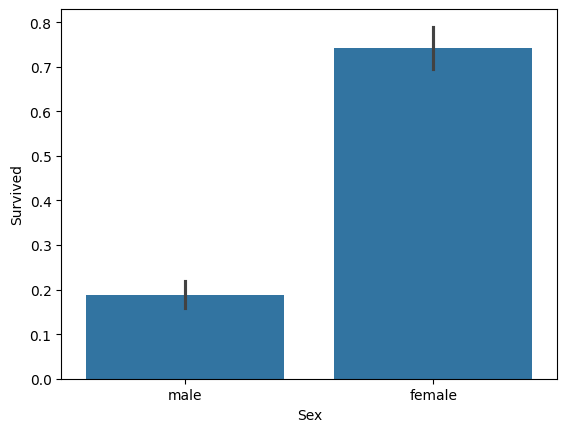

In [45]:
# 범주형 데이터 탐색 및 시각화
# 성별, 객실 등급, 나이피처가 생존과 어떤 관계있는지 확인

sns.barplot(data=titanic_df,x='Sex', y='Survived')
plt.show()

# 0: 돌아가심
# 1: 생존

# 그래프 해석
# 남자는 20% 생존, 여자는 약 75% 살았다. -> sex는 중요한 변수니 머신러닝학습에 넣어야겠다(결론)


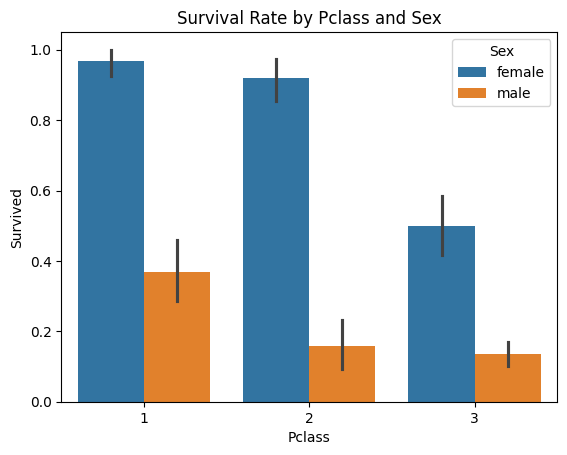

In [46]:
# 객실등급 및 성별에 따른 생존율

sns.barplot(data =titanic_df,x='Pclass',y='Survived',hue='Sex') # 성별
# data =titanic_df 먼저쓰면 '아~ Pclass는 data에서 온거구나~'를 알 수 있음
plt.title('Survival Rate by Pclass and Sex')
plt.show()

# 단. 나이데이터는 연속형이라서 지금 하는게 그래프화가 의미가 없다.

In [47]:
# 8.2 데이터 전처리

# 불필요한 컬럼 삭제
# titanic_df.drop(['PassengerId',"Name",'Ticket'], axis =1, inplace = True)
titanic_df.head()

# Cabin 컬럼은 첫 글자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'] # 여기서 바로 슬라이싱 하면 안된다.
                                          # 'Cabin'자체가 오브젝트라서 슬라이싱 안됨
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]                                      
titanic_df['Cabin'].head()

# 범주형 컬럼들을 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

# 함수: 



In [48]:
titanic_df['Cabin'].value_counts() #이 데이터들이 P-Class랑 연결됨
# T:선장실

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [49]:
features = ['Cabin','Sex','Embarked'] # 함수안만들어도 Ok
le = LabelEncoder()
for feature in features:
    le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])

titanic_df.head()

# <주의>단 이걸로 학습했을때 문제: 답이 있는 데이터여서 학습이 잘 안됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [50]:
# 모델학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀(분류)
from sklearn.metrics import accuracy_score


In [51]:
# <진짜중요>데이터와 레이블 분리 : 왜? 답이 있는 데이터로 학습 시키면 안됨]
# 변수쓸때도 주의하기! 데이터프레임 아니면 변수에 df 붙이지 않기~

y_data = titanic_df['Survived']
# 만약 titanic_df['Survived']가 'cabin'이면 cabin 예측하는 값으로 바뀜
X_data = titanic_df.drop('Survived',axis=1)

y_data # 모든 머신러닝은 '답이 있는 데이터'학습
# 신경망은 똑같아도 답이 다르면 각각 다른학습이다!
# 그니까 답이 지이이이이이인짜 중요함~~~~~~~!!!!!!!!!!!

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
# 학습/테스트 데이터를 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_data,y_data,test_size=0.2,random_state=11    
)


In [54]:
# 모델학습
df_clf = DecisionTreeClassifier(random_state =11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [55]:
# 결정 트리
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'결정트리정확도:{accuracy_score(y_test,dt_pred)}')

ValueError: could not convert string to float: 'Vander Planke, Mr. Leo Edmondus'

In [60]:
# 랜덤 포레스트
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print(f'랜덤포레스트정확도: {accuracy_score(y_test,rf_pred)}')

ValueError: could not convert string to float: 'Vander Planke, Mr. Leo Edmondus'

In [62]:
# 로지스틱 회귀
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print(f'로지스틱 회귀 정확도:{accuracy_score(y_test, lr_pred)}')

ValueError: could not convert string to float: 'Vander Planke, Mr. Leo Edmondus'

In [65]:
# 교차검증 : cross_val_score()
# DecisionTree

from sklearn.model_selection import cross_val_score


score_dt = cross_val_score(
    dt_clf,    
    X_data,
    y_data,
    cv=5
)

print(f"평균 정확도:{np.mean(score_dt)}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\tree\_classes.py", line 1024, in fit
    super()._fit(
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\tree\_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2966, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Baumann, Mr. John D'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\tree\_classes.py", line 1024, in fit
    super()._fit(
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\tree\_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2966, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'


In [ ]:
score_dt = cross_val_score(
    rf_clf,    
    X_data,
    y_data,
    cv=5
)

print(f"평균 정확도:{np.mean(score_dt)}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Baumann, Mr. John D'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'


In [67]:
score_dt = cross_val_score(
    lr_clf,    
    X_data,
    y_data,
    cv=5
)

print(f"평균 정확도:{np.mean(score_dt)}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1247, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Baumann, Mr. John D'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1247, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\ml_dev\Lib\site-packages\pandas\core\generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'


In [77]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [2,3,5,10],       #4
    'min_sample_split' : [2,3,5],   #3
    'min_sample_leaf' : [1,5,8]     #3
}
grid_dtclf = GridSearchCV(
    dt_clf,
    params_grid = params,
    scoring='accuracy',
    cv=5
)
grid_dtclf.fit(X_train,y_train)
print(f'최적  파라미터: {grid_dtclf.best_params_}') # 최고점수가 나오는 파라미터가 뭐였는데~~
print(f"최고정확도 : {grid_dtclf.best_score_}")

# 테스트 데이터(일반화) 성능 파악
best_clf = grid_dtclf.best_estimator_ # 최적 모델
preds = best_clf.predict(X_test)
print(f'테스트 데이터 정확도: {accuracy_score(y_test,preds)}')

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'params_grid'

In [ ]:
# 결론 :GridsearchCV가 엄청 중요하다는.....